# Pre-trained YOLOv8

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 20.1 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import os
from IPython.display import Image, display
from IPython import display
display.clear_output()

## Get the video for the example

In [ ]:
# !pip install gdown

# import gdown
# file_id = "18XVAf6x4_UWENPLwpimJA-Y1q9pqFXPQ"
# url = f"https://drive.google.com/uc?id={file_id}"
# output_path = "/content/input_video.mp4"
# gdown.download(url, output_path, quiet=False)
# print(f"Video downloaded successfully to {output_path}!")

Downloading...
From: https://drive.google.com/uc?id=18XVAf6x4_UWENPLwpimJA-Y1q9pqFXPQ
To: /content/input_video.mp4
100%|██████████| 1.54M/1.54M [00:00<00:00, 122MB/s]

Video downloaded successfully to /content/input_video.mp4!


## YOLO using CLI

In [12]:
# Using the YOLO CLI, we can run the following command to detect and classify objects in an image:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://miro.medium.com/v2/resize:fit:1400/1*EYFejGUjvjPcc4PZTwoufw.jpeg'

# Breakdown of the command:
# yolo: Executes the YOLOv8 object detection model.
# task=detect: Specifies the task type as object detection.                         To see more visit the following(https://docs.ultralytics.com/tasks)
# mode=predict: Runs the model in prediction mode.                                  To see more visit the following(https://docs.ultralytics.com/modes)
# model=yolov8n.pt: Uses the pre-trained YOLOv8n model (the lightweight variant).   To see more visit the following(https://docs.ultralytics.com/models/yolov8/#performance-metrics)
# conf=0.25: Sets the confidence threshold for object detection to 25%.
# source='...': Provides the URL of the image for object detection.

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 111k/111k [00:00<00:00, 5.87MB/s]
image 1/1 /content/1*EYFejGUjvjPcc4PZTwoufw.jpeg: 448x640 1 person, 1 bicycle, 8 cars, 1 traffic light, 37.6ms
Speed: 8.3ms preprocess, 37.6ms inference, 629.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


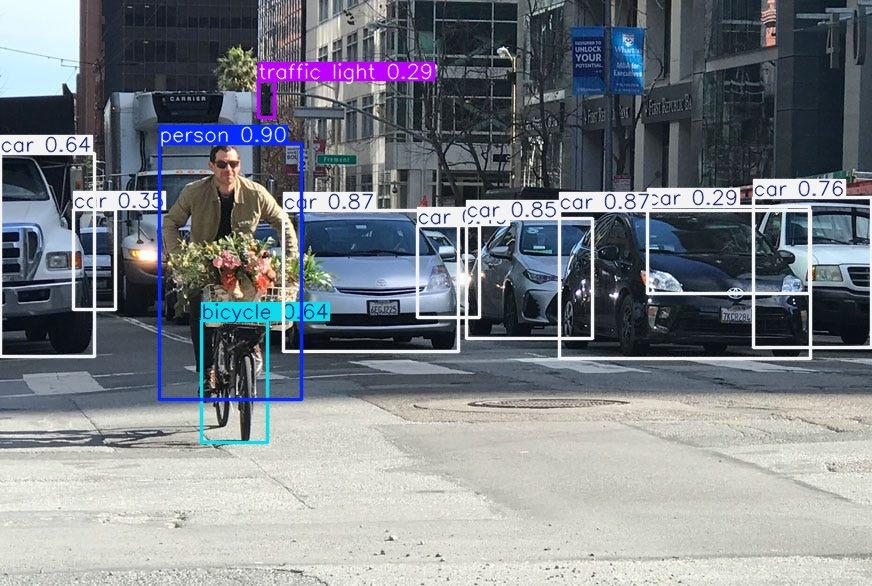

In [13]:
# The image's location will be shown in the output of the previous code cell, similar to this:
# Results saved to runs/detect/predict

# To display the detected image directly in your notebook, use the following code:
Image(filename='runs/detect/predict/1*EYFejGUjvjPcc4PZTwoufw.jpeg', height=600)

## YOLO and OpenCV

In [3]:
import cv2
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # Change 'yolov8n.pt' to 'yolov8s.pt', 'yolov8m.pt', etc., based on your desired model size.

100%|██████████| 6.25M/6.25M [00:00<00:00, 59.2MB/s]


#### Prepare the OpenCV parameters

In this section, we prepare the necessary OpenCV parameters for processing the video and saving the results. The primary goal is to ensure the video properties are correctly captured and used for output, and that a codec is chosen for the video writer.

Steps:
1. Load the Video: We load the input video using OpenCV’s VideoCapture() method. This method is responsible for opening the video file so that we can read it frame by frame.
2. Retrieve Video Properties: We extract key properties from the input video, such as width, height, and frames per second (FPS). These properties are essential for ensuring the output video matches the dimensions and timing of the original.
3. Define the Codec: To save the video, we define the codec using OpenCV’s VideoWriter_fourcc() method. The codec determines how the video is compressed. For .mp4 files, we use the mp4v codec, which ensures compatibility and compression efficiency.
4. Initialize VideoWriter: We create a VideoWriter object using OpenCV’s VideoWriter() method. This object will handle writing each processed frame to the output video file. We pass in the output file path, the codec, FPS, and frame size.
5. Frame Processing: We iterate over the frames of the input video. For each frame, we perform the necessary operations, such as detecting objects and drawing bounding boxes. Once the frame is processed, it is written to the output video using the out.write() method.
6. Release Resources: After processing all frames, we release the video capture and writer resources to ensure the output file is properly saved and all resources are freed.

Parameters Breakdown:
* cap: Used to capture and read the video frame by frame.
* width, height, fps: Ensure that the output video maintains the same dimensions and timing as the input video.
* fourcc: Specifies the codec used to compress and encode the output video.
* out: Handles writing the processed frames to the output video file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
# Open the input video
video_path = '/content/videoplayback.mp4'  # Path to the video file to be processed
cap = cv2.VideoCapture(video_path)  # Capturing the video using OpenCV's VideoCapture method, which allows you to read the video frame by frame

In [5]:
# Get video details
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Retrieves the width of the video frame
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Retrieves the height of the video frame
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Retrieves the frames per second (FPS) of the video

# The same thing can be done using the corresponding property index numbers:
'''
width = int(cap.get(3))  # Property index 3 corresponds to frame width
height = int(cap.get(4))  # Property index 4 corresponds to frame height
fps = int(cap.get(5))  # Property index 5 corresponds to frames per second (FPS)
'''

'\nwidth = int(cap.get(3))  # Property index 3 corresponds to frame width\nheight = int(cap.get(4))  # Property index 4 corresponds to frame height\nfps = int(cap.get(5))  # Property index 5 corresponds to frames per second (FPS)\n'

In [6]:
# Define the codec and create VideoWriter object to save the output video
output_path = '/content/output_video_with_yolov8.mp4'  # Desired output path for the processed video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specifies the codec to be used for the output video file. 'mp4v' is the codec for .mp4 format
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))  # Creates a VideoWriter object to write the output video
# Parameters:
# - output_path: Path to save the output video
# - fourcc: Codec used to compress the frames
# - fps: Frames per second for the output video, keeping it consistent with the input video
# - (width, height): Frame dimensions of the output video, matching the input video size

In [7]:
ret, frame = cap.read()  # Reads a frame from the video.
# 'ret' is a boolean indicating if the frame was successfully read (True or False).
# 'frame' is the actual frame captured from the video.

results = model(frame)  # Passes the frame to the YOLOv8 model for object detection.
# 'results' contains the detection output, including detected objects, bounding boxes, and class predictions.


0: 384x640 (no detections), 137.7ms
Speed: 6.1ms preprocess, 137.7ms inference, 160.7ms postprocess per image at shape (1, 3, 384, 640)


In [8]:
results[0].boxes.xyxy.cpu().numpy()  # This line extracts the bounding box coordinates in the [x1, y1, x2, y2] format.

# Here's what each part does:
# results[0].boxes: Accesses the bounding boxes for detected objects in the first result.
# xyxy: Retrieves the coordinates of the bounding boxes in the (x1, y1, x2, y2) format, where:
#   - (x1, y1) represents the top-left corner of the bounding box.
#   - (x2, y2) represents the bottom-right corner of the bounding box.
# cpu(): Moves the tensor data from the GPU to the CPU (if the model was run on a GPU).
# numpy(): Converts the tensor data to a NumPy array for further manipulation or analysis.

array([], shape=(0, 4), dtype=float32)

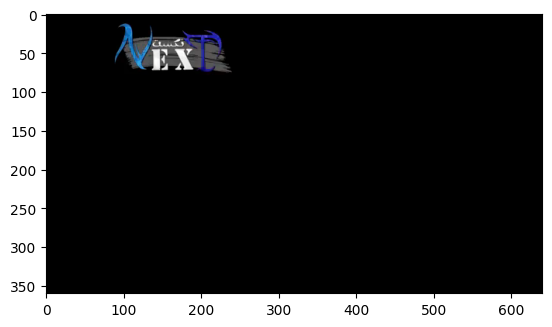

In [9]:
import matplotlib.pyplot as plt  # Importing Matplotlib for displaying images

# Get the annotated frame with detections from the YOLO model
annotated_frame = results[0].plot()  # The 'plot()' method returns the image with bounding boxes and labels drawn on it

# Display the annotated frame using Matplotlib
plt.imshow(annotated_frame)  # Displays the annotated frame as an image in the notebook
plt.show()  # Renders the image to be visible in the output

In [10]:
for result in results:  # Iterates through each detection result (one for each image/frame)
    # Prints the bounding box coordinates in XYXY format
    print("Bounding Box Coordinates (XYXY):\n", result.boxes.xyxy.cpu().numpy(), "\n")
    # The bounding box coordinates are moved to the CPU and converted to a NumPy array, then printed.

    # Prints the confidence scores for each detected object
    print("Confidence Scores:\n", result.boxes.conf.cpu().numpy(), "\n")
    # Confidence scores represent the model's confidence in the detection for each object.
    # These are also moved to the CPU and converted to a NumPy array before printing.

    # Prints the class labels for each detected object
    print("Class Labels:\n", result.boxes.cls.cpu().numpy(), "\n")
    # The class labels correspond to the object classes (e.g., 0 for 'person', 2 for 'car').
    # These are moved to the CPU and converted to a NumPy array for printing.

Bounding Box Coordinates (XYXY):
 [] 

Confidence Scores:
 [] 

Class Labels:
 [] 




```plaintext
### Bounding Box Coordinates (XYXY):
[[  417.72   16.25  461.7   56.383]
 [  418.24   16.742 462.16  56.688]
 [  353.28  134.18  457.17  265.78]]

### Confidence Scores:
[0.41113  0.39746  0.28436]

### Class Labels:
[7 2 2]
```

### Explanation:
- **Bounding Box Coordinates (XYXY):**
  - Each row represents the coordinates of a detected object's bounding box, in the format `[x1, y1, x2, y2]`:
    - `x1`, `y1`: Top-left corner of the bounding box.
    - `x2`, `y2`: Bottom-right corner of the bounding box.
  
  - For example, the first detected object spans from `(417.72, 16.25)` (top-left corner) to `(461.7, 56.383)` (bottom-right corner).

- **Confidence Scores:**
  - These values represent the model's confidence in its predictions for each detected object.
  - For example, the model is 41.1% confident in the first detection.

- **Class Labels:**
  - Numerical labels correspond to the detected object classes:
    - `7`: 'truck'
    - `2`: 'car'
    
  - The first detected object is labeled as class 7 ('truck'), and the next two are labeled as class 2 ('car').
```

In [11]:
# Colors for drawing the bounding boxes (optional)
color = (0, 255, 0)  # Green color for boxes
thickness = 2  # Thickness of the bounding box lines

# Process the video frame by frame
while cap.isOpened():  # Loop while the video capture is open
    ret, frame = cap.read()  # Read the next frame from the video
    if not ret:  # If no frame is read (end of video), break the loop
        break

    # Make YOLO predictions on the frame
    results = model(frame)

    # Get the bounding boxes, confidences, and class labels from the results
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Extract bounding box coordinates (x1, y1, x2, y2)
        confidences = result.boxes.conf.cpu().numpy()  # Extract confidence scores for each detected object
        class_ids = result.boxes.cls.cpu().numpy()  # Extract class IDs for each detected object

        # Draw each bounding box on the frame
        for box, conf, class_id in zip(boxes, confidences, class_ids):
            x1, y1, x2, y2 = map(int, box)  # Convert bounding box coordinates to integers
            label = f'{model.names[int(class_id)]}: {conf:.2f}'  # Create the label with class name and confidence score

            # Draw the bounding box on the frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)  # Draw the rectangle

            # Put the label above the bounding box
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)  # Add the label text

    # Write the processed frame with bounding boxes and labels to the output video
    out.write(frame)

# Release the video capture and writer resources
cap.release()  # Close the video file being read
out.release()  # Close the video file being written

print(f"Video saved to {output_path}")  # Print the confirmation message with the output path


0: 384x640 (no detections), 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.4ms
Speed: 1.3ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.5ms
Speed: 2.6ms preprocess, 6.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.7ms
Speed: 2.1ms preprocess, 6.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.4ms
Speed: 2.4ms preprocess, 10.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 kite, 8.9ms
Speed: 1.3ms preprocess, 8.9ms inference, 644.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 kite, 10.0ms
Speed: 2.7ms preprocess, 10.0ms inference, 1.2ms postprocess 